In [1]:
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Aula 14: Análise de Tópicos com Fatoração por Matriz Não-Negativa
**Objetivo: ao fim desta aula, o aluno será capaz de aplicar análise de tópicos para entender os diferentes assuntos que são comentados em uma coleção**

# Exercício 1
*Objetivo: explicar o que é uma matriz de documentos por palavras*

No código a seguir:

1. O que significa cada linha e cada coluna que compõe a matriz x que foi impressa? 
1. Existem palavras que, de acordo com a matriz x, tipicamente aparecem juntas em documentos deste corpus? Quais são?

In [2]:
texto1 = "adoro festa junina"
texto2 = "odeio festa junina"
texto3 = "big brother brasil é legal"
texto4 = "big brother brasil é chato"
corpus = [texto1, texto2, texto3, texto4]
vectorizer = CountVectorizer(binary=True)
x = vectorizer.fit_transform(corpus)
print(x.toarray())

[[1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 0 1]
 [0 1 1 1 0 0 0 1 0]
 [0 1 1 1 1 0 0 0 0]]


# Exercício 2
*Objetivo: explicar o que é uma decomposição com perdas*

Em nosso corpus, temos duas categorias de textos: os que falam de festa junina e os que falam de big brother brasil. 

1. Como seria um vetor correspondente a um documento que tipicamente fala de festa junina?
1. E o correspondente a um documento que tipicamente fala de big brother brasil?
1. Se usássemos somente esses vetores típicos para cada categoria, ao invés dos documentos em si, que tipo de informação nós conservamos? Que tipo de informação nós perdemos?
1. Ao decompor nossos documentos em vetores prototípicos, houve perda de informação? Justifique.

# Exercício 3
*Objetivo: aplicar a representação matricial*

Em nosso processo de decomposição, partimos de uma matriz X, que é de documentos ($d$) por palavras ($p$), ou: $X_{d,p}$

Vamos decompor essa matriz em duas outras matrizes. A primeira delas relaciona documentos a tópicos: $B_{d,t}$

Idealmente, qual deveria ser o conteúdo da matriz B em nosso caso?

# Exercício 4
*Objetivo: modelar matematicamente a decomposição usando álgebra matricial*

Na decomposição, gostaríamos de encontrar duas matrizes que, se forem multiplicadas, podem gerar novamente a matriz original. Então, teremos algo como:
X_{d,p}=B_{d,t} A_{?,?}

1. Quais devem ser obrigatoriamente as dimensões da matriz A, para que a multiplicação BA seja válida e gere uma matriz com as dimensões de X?
1. O que significa cada elemento da matriz A?



# Exercício 5
*Objetivo: explicar o erro na decomposição com perdas*

Na decomposição $X=BA$, existem casos em que a multiplicação $BA$ pode não ser igual a $X$. Nesse caso, definimos um erro:

$$
e = ||X-BA||^2
$$

Sabemos que o número de documentos ($d$) e de palavras ($p$) depende somente do dataset, isto é, temos controle apenas sobre o número de tópicos $t$.

Como o valor de $e$ deve se comportar em relação ao valor de $t$?

# Exercício 6
*Objetivo: usar a decomposição do tipo fatoração por matrizes não negativas em nosso toy-corpus*

O código abaixo aplica a fatoração por matrizes não-negativas (Non-Negative Matrix Factorization).

Ele funciona da seguinte forma:
* Recebe X como entrada
* Encontra os coeficientes das matrizes $B$ e $A$ minimizando $e = ||X-BA||^2$
* Todos os coeficientes devem ser maiores ou iguais a zero


1. O que significa o parâmetro n_components? A qual parâmetro ele corresponde na equação do Exercício 4?
1. Como devemos interpretar a saída y? A qual parâmetro y corresponde na equação do Exercício 4?
1. Os resultados mostrados na saída y correspondem a aquilo que você previu no exercício 3? Por que?

In [3]:
nmf = NMF(n_components=2, init='nndsvda')
y = nmf.fit_transform(x)
print(y)

[[0.         0.79016168]
 [0.         0.79016168]
 [0.64232557 0.        ]
 [0.64232557 0.        ]]


# Exercício 7
*Objetivo: interpretar a representação interna dos componentes em nossa fatoração*

Podemos encontrar o último componente restante de nossa fatoração acessando uma variável interna do modelo:
`print(nmf.components_)`

1. A qual parâmetro da equação do exercício 4 corresponde a matriz em nmf.components_?
1. Como devemos interpretar cada um dos parâmetros dela?
1. Como seria possível mostrar graficamente o quanto cada palavra participa de cada tópico? (se quiser, veja inspirações em https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)



In [4]:
print(nmf.components_)

[[0.         1.55684289 1.55684289 1.55684289 0.77842144 0.
  0.         0.77842144 0.        ]
 [0.63278189 0.         0.         0.         0.         1.26556378
  1.26556378 0.         0.63278189]]


# Exercício 8
*Objetivo: aplicar o processo de fatoração para visualizar tópicos em uma coleção*

Aplique o processo de fatoração por NMF para visualizar, em tópicos, a coleção do IMDB. Use dois tópicos e limite o número de palavras no CountVectorizer em poucas centenas (ou então o NMF vai demorar muito a rodar).

Como você interpreta as palavras mais salientes de cada tópico?




In [5]:
df = pd.read_csv('./datasets/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
n_palavras = 100
n_components = 2
vectorizer = CountVectorizer(binary=True, max_features=n_palavras)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda')
y = nmf.fit_transform(X.toarray())
print(y.shape)

(50000, 100)
(50000, 2)


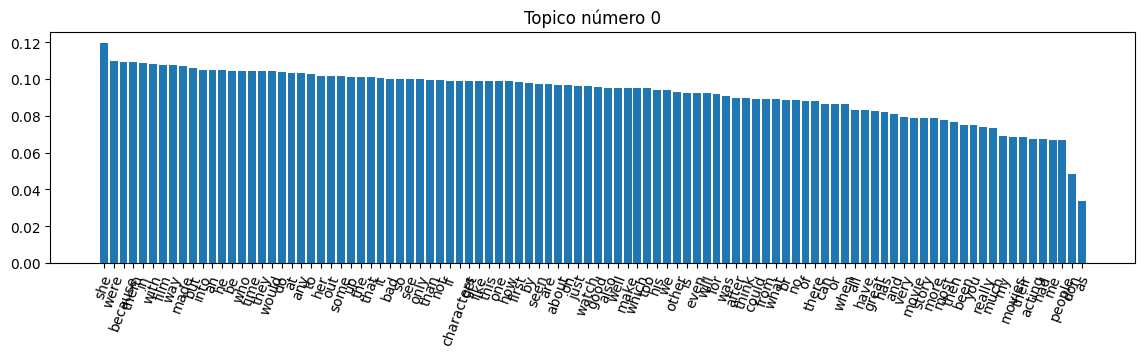

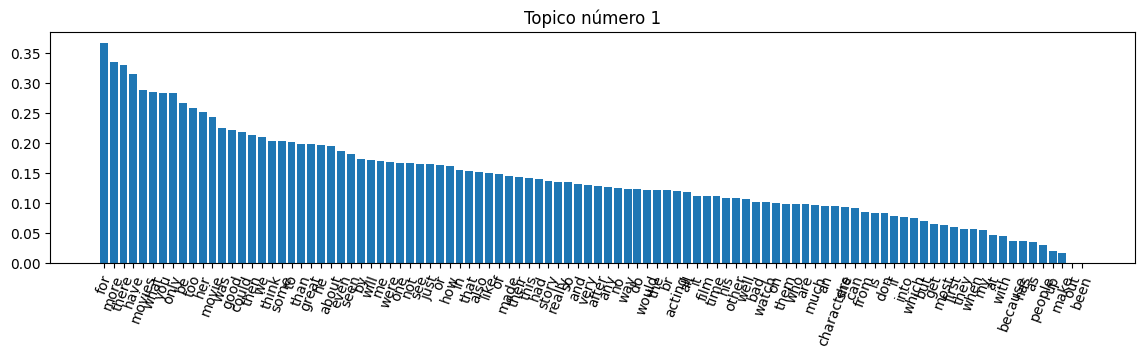

In [7]:
for n in range(n_components):
    tuplas = [ (y[vectorizer.vocabulary_[i],n], i) for i in vectorizer.vocabulary_.keys() ]
    tuplas_ordenadas = sorted(
    tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
    palavras = [ t[1] for t in tuplas_ordenadas ]
    contagens = [ t[0] for t in tuplas_ordenadas ]
    plt.figure(figsize=(14,3))
    eixo_x = np.arange(n_palavras)
    plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
    plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
    plt.title("Topico número " + str(n))
    plt.show()

# Exercício 9
*Objetivo: verificar a correlação entre diferença semântica e distância euclidiana na projeção NMF*

A matriz A (que sai em `nmf.components_`) liga cada palavra a um vetor.

1. Encontre os vetores ligados às palavras: “director”, “actor” e “excelent”
1. Calcule a distância euclidiana entre esses vetores. O que você observa?
1. Teste com outros trios de palavras e verifique se essa observação se mantém.


# Exercício 10
*Objetivo: comparar classificadores usando tópicos a classificadores usando palavras*

A fatoração faz com que cada palavra seja representada num espaço vetorial de tópicos.

Podemos pensar que o espaço vetorial de tópicos pode levar a classificações mais robustas, uma vez que trata-se de um espaço de dimensão mais baixa e cujo significado é compreensível a nós (analistas).

Usando o dataset de sua preferência, programe e avalie um classificador que use como entrada a representação das palavras em tópicos, e não mais a entrada do `vectorizer` diretamente.

Dica: reveja suas premissas quanto ao significado das dimensões e use um tipo de classificador que corresponde a essas premissas.

# Exercício 11
*Objetivo: comparar a distância euclidiana de projeções NMF com a distância em ontologias*

Até o momento, fizemos dois tipos de distâncias ou semelhanças que são ligados ao significado de palavras: usando ontologias e usando NMF.

Podemos então nos perguntar: "será que as duas distâncias mostram a mesma coisa?".

Faça um experimento que demonstre se as distâncias baseadas em grafos na Wordnet são redundantes em relação às distâncias obtidas usando NMF.
